# Exploratory Data Analysis 

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Upload the AB_NYC_2019 to import the data as below

In [2]:
#reading the CSV file
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [3]:
#creating copy of dataframe
df1 = df.copy()

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
#information on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

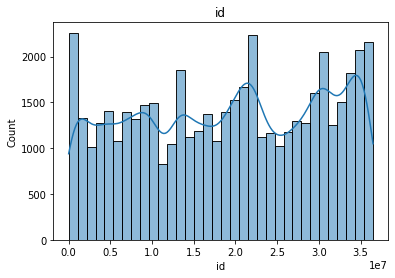

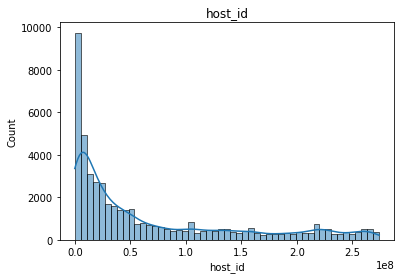

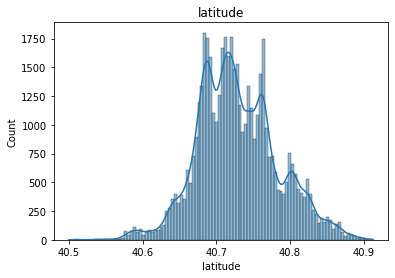

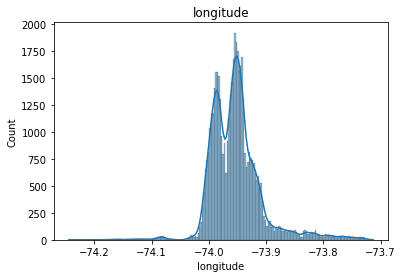

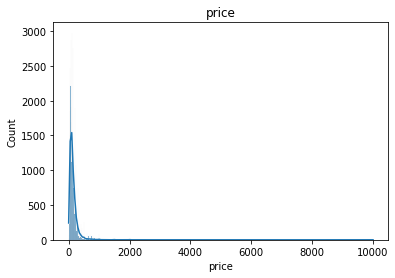

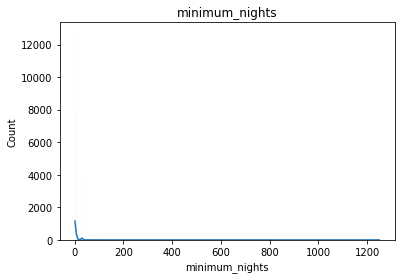

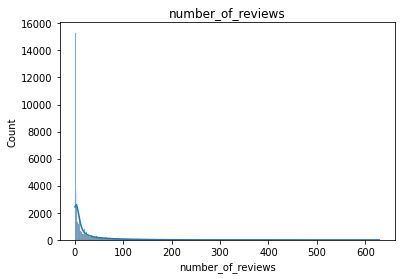

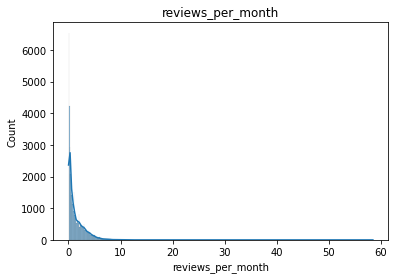

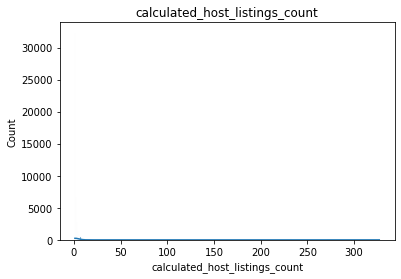

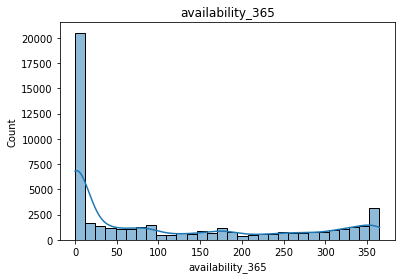

In [ ]:
#histogram of all numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(data=df[col], kde=True)
    plt.title(col)

# show the plots
plt.show()

#might be interesting to look into minimum_nights, number_of_reviews, reviews_per_month columns

1
1250


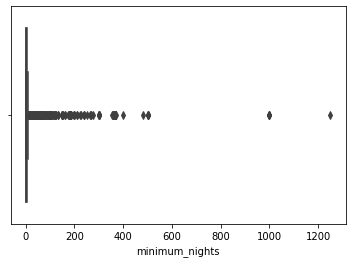

In [ ]:
#boxplot of minimum nights - appears to be outliers since it ranges from 1-1250
sns.boxplot(x=df["minimum_nights"])
print(df['minimum_nights'].min())
print(df['minimum_nights'].max())

In [ ]:
#calculated_host_listings_count
print(df['calculated_host_listings_count'].min())
print(df['calculated_host_listings_count'].max())

#can make a new feature out of this? - new hosts vs experienced hosts?

1
327


<AxesSubplot:>

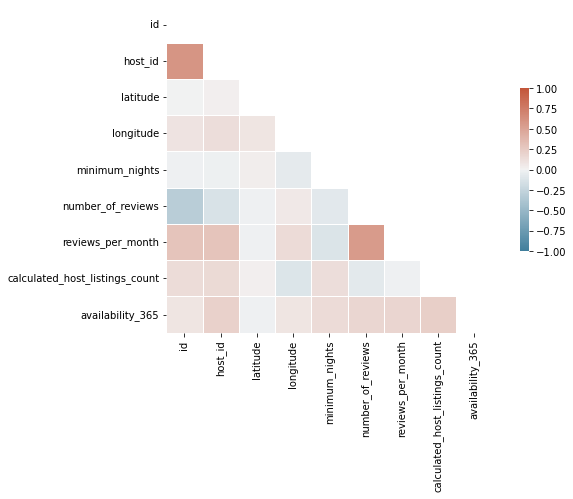

In [ ]:
#Compute the correlation matrix of features
corr = df.loc[:, df.columns!='price'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

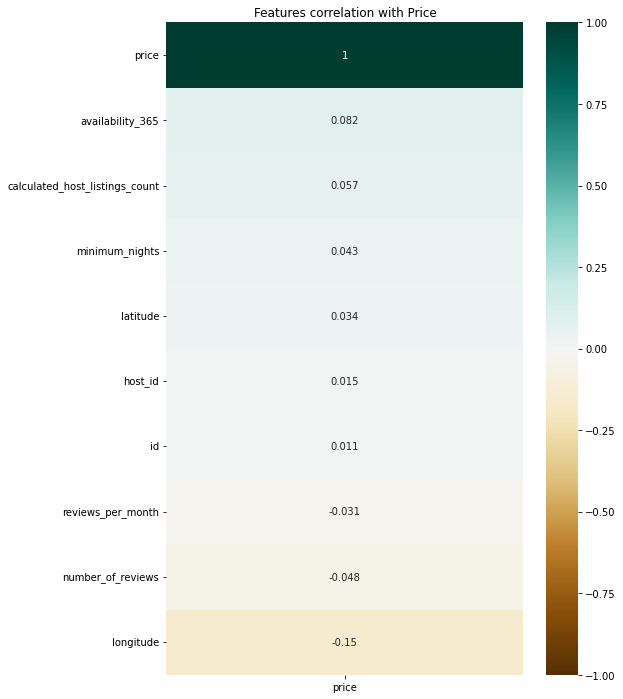

In [ ]:
#Correlation of numerical features with label (price)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features correlation with Price');

In [ ]:
#listing categorical columns
cat_cols=df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


Listings per neighbourhood:
 Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

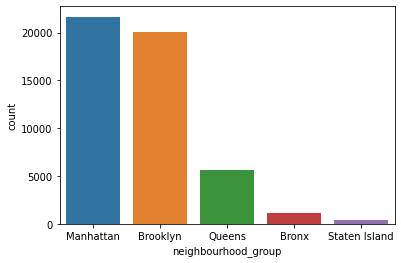

In [ ]:
#neighbourhood group
print("Listings per neighbourhood:\n", df.neighbourhood_group.value_counts())
sns.countplot(data=df, x=df['neighbourhood_group'], order=df["neighbourhood_group"].value_counts(ascending=False).index)

Room types of listings:
 Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


<AxesSubplot:xlabel='room_type', ylabel='count'>

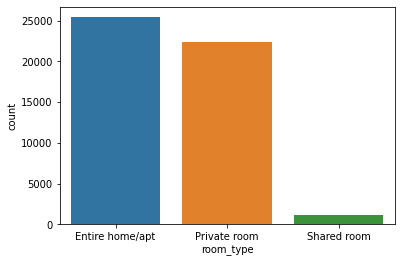

In [ ]:
#room types
print("Room types of listings:\n", df.room_type.value_counts())
sns.countplot(data=df, x=df['room_type'], order=df["room_type"].value_counts(ascending=False).index)

In [ ]:
#average price per room type
grouped = df.groupby("room_type")["price"].mean()
print(grouped)

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


# Preprocessing

In [5]:
#checking for null values
percent_missing = df.isnull().sum() * 100 / len(df)
print(df.isnull().sum())
print("\n\n\nPercentage of Missing Values\n")
print(percent_missing.sort_values(ascending=False))

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64



Percentage of Missing Values

last_review                       20.558339
reviews_per_month                 20.558339
host_name                          0.042949
name                               0.032723
id                                 0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighb

In [6]:
#check how many rows have 'last_review' AND 'reviews_per_month' as null
new_df = df[(df['last_review'].isnull()) & (df['reviews_per_month'].isnull())]
new_df.shape[0]

#there are 10052 rows
#if there is no last_review date, it implies that the property never got a review in the first place so the reviews_per_month will be null too

10052

how do we deal with this?
1. remove all the rows

2. if there is no last_review_date, the property never got reviewed, implying that the reviews_per_month can be made 0 (impute all null values with 0 instead)

In [ ]:
# #dealing with missing values
# #for now, dropping all the rows that have NaN in both the columns 
# df = df.drop(df[(df['last_review'].isnull()) & (df['reviews_per_month'].isnull())].index)

# print(df.isnull().sum())
# print("\nLength:",len(df))

# #the dataframe now has 38843 rows

In [7]:
#Replace all nulls with 0 in the reviews_per_month column since if there was no last review, the property has 0 reviews
df['reviews_per_month'] = df['reviews_per_month'].fillna(value=0)

In [8]:
#dealing with last_review - fill in the earliest date present in the whole dataset

df['last_review_dt'] = pd.to_datetime(df['last_review'])
min_date = df['last_review_dt'].min()
print("The minimum date is", min_date.date())

The minimum date is 2011-03-28


In [9]:
#fill in the null values with the min date
df['last_review'] = df['last_review'].fillna(value=min_date)

In [10]:
#drop last_review_dt column
df = df.drop(['last_review_dt'],axis=1)

Use the last_review to engineer a new feature. Don't use as is

In [11]:
#removing duplicate values
df = df.drop_duplicates(subset = 'id', keep = 'last')

In [12]:
#dropping columns which are not required
#null values in name and host_name are not being dealt with because we drop those columns for now
#for time being dropping last review as well
df = df.drop(['id','name','host_name','host_id','last_review'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.5+ MB


Log normalization can be useful for numerical features that have a skewed distribution. Skewed distributions can cause issues for some machine learning models, such as linear regression, which assume that the target variable is normally distributed.

Log normalization can help reduce the impact of outliers and bring the distribution of the feature closer to a normal distribution. This can improve the performance of models that assume normality.

Here are some general guidelines to consider when deciding whether to normalize a numerical feature using log:

Skewness: If the feature has a high degree of skewness, log normalization may be appropriate. A commonly used threshold for skewness is 1 or -1, meaning that if the skewness is greater than 1 or less than -1, log normalization may be beneficial. Magnitude: Log normalization is also useful for features that have a wide range of values. Features with large magnitudes can have a disproportionate impact on the model, and log normalization can help to reduce this effect.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

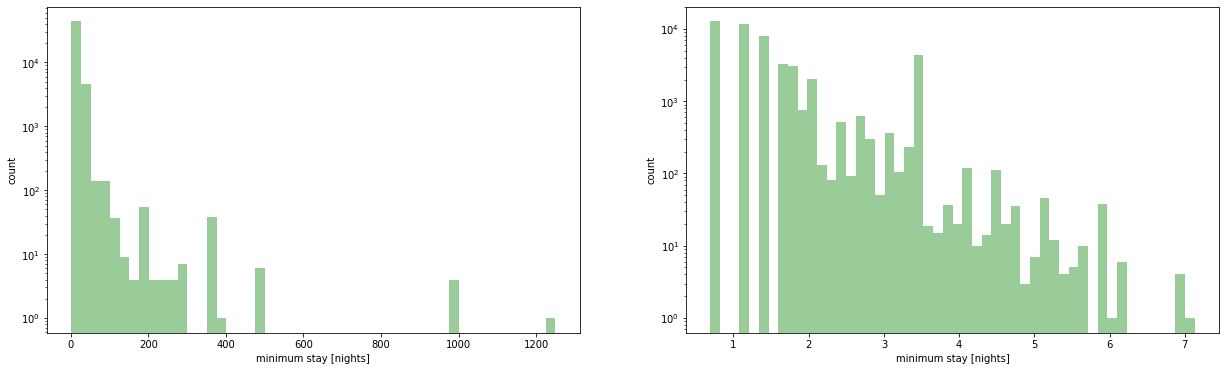

In [13]:
#checking distribution of minimum_nights
fig, axes = plt.subplots(1,2, figsize=(21, 6))

sns.distplot(df['minimum_nights'], rug=False, kde=False, color="green", ax = axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('minimum stay [nights]')
axes[0].set_ylabel('count')

sns.distplot(np.log1p(df['minimum_nights']), rug=False, kde=False, color="green", ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_xlabel('minimum stay [nights]')
axes[1].set_ylabel('count')

In [14]:
#log transforming feature because of skewed distribution
df['minimum_nights'] = np.log1p(df['minimum_nights'])

(0.0, 365.0)

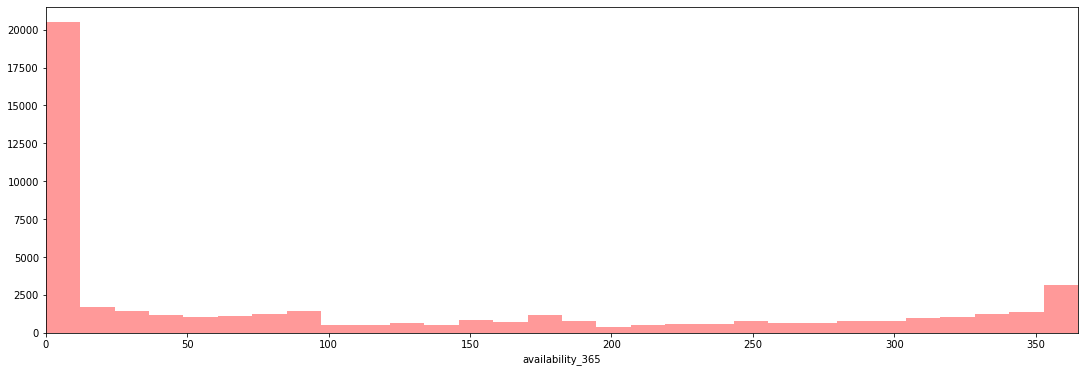

In [15]:
#availability of the properties
fig, axes = plt.subplots(1,1,figsize=(18.5, 6))
sns.distplot(df['availability_365'], rug=False, kde=False, color="red", ax=axes)
axes.set_xlabel('availability_365')
axes.set_xlim(0, 365)

Creating a new feature with availability
1. Low availability (1 month) : below 30 days 
2. Available : between 30 days to 350 days 
3. High availability : more than 350 days 

We can see most properties are available for either less than ~ 20-30 days ot more than ~ 350 days

In [16]:
df['low_avail'] = (df['availability_365'] <= 30)
df['avail'] = ((df['availability_365'] > 30) & (df['availability_365'] <= 350))
df['high_avail'] = (df['availability_365'] > 350)

In [17]:
df = df.drop(['availability_365'],axis=1)

Properties with no reviews available : account for 20% of the data. Engineering a new feature for it

In [18]:
df['no_reviews'] = (df['reviews_per_month']==0)

### Normalizing Target Variable

Normalizing the target variable in a regression problem can be useful in situations where the range of values in the target variable is large and/or the distribution is skewed. Normalization can help improve the performance of certain machine learning models that are sensitive to the scale and distribution of the target variable.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'log(1+price)')

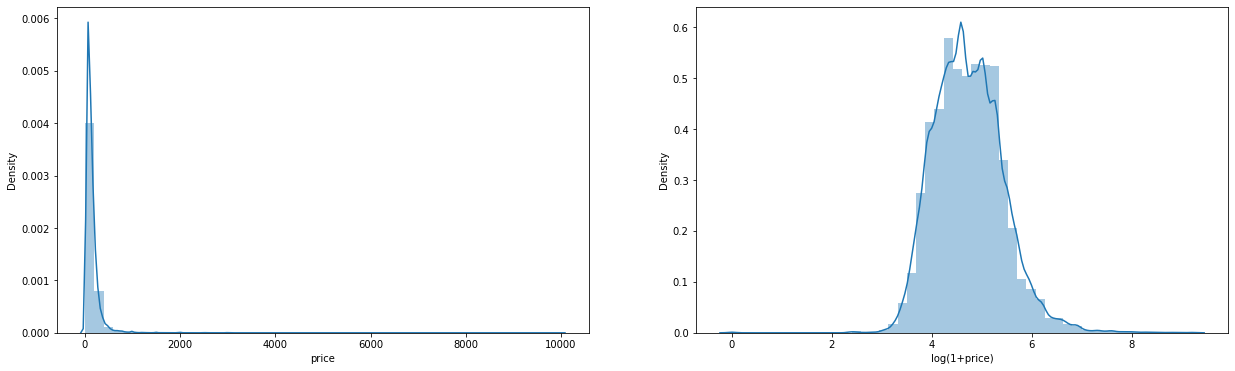

In [19]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['price'], ax=axes[0])
sns.distplot(np.log1p(df['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')

Hence, we decide to narrow down our dataset to those where log of price is between 3 and 8 (covers most of the values)

In [20]:
df = df[np.log1p(df['price']) < 8]
df = df[np.log1p(df['price']) > 3]

Log transform the price variable

In [21]:
df['price'] = np.log1p(df['price'])

Encoding and Scaling variables

In [ ]:
# #Encoding categorical variables
# #listing categorical columns and the unique values
# cat_cols=df.select_dtypes(include=['object']).columns
# for column in cat_cols:
#     unique_values = df[column].nunique()
#     print(column,":", unique_values)

# #how relevant is name of the property and host_name to the price?

In [22]:
#Encoding categorical variables
categorical_features = df.select_dtypes(include=['object'])
categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
#Picking numerical features and dropping price
numerical_features =  df.select_dtypes(exclude=['object'])
y = numerical_features.price
numerical_features = numerical_features.drop(['price'], axis=1)
print('Numerical features: {}'.format(numerical_features.shape))

Numerical features: (48784, 10)


In [24]:
X = np.concatenate((numerical_features, categorical_features_one_hot), axis=1)
X_df = pd.concat([numerical_features, categorical_features_one_hot], axis=1)

In [25]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48784 entries, 0 to 48894
Columns: 239 entries, latitude to room_type_Shared room
dtypes: bool(4), float64(4), int64(2), uint8(229)
memory usage: 13.4 MB


In [26]:
len(y)

48784

### Split the dataset into train, test, and label

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=1)

In [28]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Bagging

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

n_folds = 5

# squared_loss
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)

### Decision Trees - base model

Implement Decision Tree with GridSearch to get base model for bagged DT regressor

In [ ]:
# #Gridsearch for DT
# # Define the parameter space to search over
# param_grid = {
#     "max_depth": range(5,15,1),
#     "min_samples_split": [2, 4, 8],
#     "min_samples_leaf": [1, 2, 4]
# }

# # Create a decision tree regressor
# tree = DecisionTreeRegressor()

# # Create a GridSearchCV object
# grid_search = GridSearchCV(tree, param_grid, cv=5, verbose=True)

# # Fit the GridSearchCV object on the data
# grid_search.fit(X, y)

# # Print the best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create a decision tree regressor with a max depth of 3
tree = DecisionTreeRegressor(criterion='squared_error', max_depth=12,
                           max_features='sqrt', min_samples_leaf=10,
                           splitter='best', random_state=1)
# CV error
tree_cv_baseline = -rmse_cv(DecisionTreeRegressor(criterion='squared_error', max_depth=12,
                           max_features='sqrt', min_samples_leaf=10,
                           splitter='best', random_state=1))

# Fit the model on the training data
tree.fit(X_train, y_train)

# Predict on the train data
y_trainpred_tree = tree.predict(X_train)

# Predict on the testing data
y_pred_tree = tree.predict(X_test)

tree_best_results = pd.DataFrame({'algorithm':['Decision Tree - Base Model'],
            'CV error': tree_cv_baseline.mean(), 
            'CV std': tree_cv_baseline.std(),
            'training error': [mean_squared_error(y_train, y_trainpred_tree)],
            'test error': [mean_squared_error(y_test, y_pred_tree)],
            'training_r2_score': [r2_score(y_train, y_trainpred_tree)],
            'test_r2_score': [r2_score(y_test, y_pred_tree)]})
tree_best_results

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,Decision Tree - Base Model,0.264577,0.014911,0.241688,0.248268,0.473226,0.460607


###SVR - base model

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# CV error
svr_cv_baseline = -rmse_cv(SVR(kernel='rbf', C=1.0, epsilon=0.1))

# Create a Support Vector Regression object
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

svr.fit(X_train, y_train)

# Train predictions
y_trainpred_svr = svr.predict(X_train)

# Test predictions
y_pred_svr = svr.predict(X_test)

svr_best_results = pd.DataFrame({'algorithm':['SVR - Base Model'],
            'CV error': svr_cv_baseline.mean(), 
            'CV std': svr_cv_baseline.std(),
            'training error': [mean_squared_error(y_train, y_trainpred_svr)],
            'test error': [mean_squared_error(y_test, y_pred_svr)],
            'training_r2_score': [r2_score(y_train, y_trainpred_svr)],
            'test_r2_score': [r2_score(y_test, y_pred_svr)]})
svr_best_results

###ElasticNet - base model

In [ ]:
#baseline elasticnet
from sklearn.linear_model import ElasticNet

# CV error
en_cv_baseline = -rmse_cv(ElasticNet(alpha=0.001, l1_ratio=0.5))

# Define elasticnet
en = ElasticNet(alpha=0.001, l1_ratio=0.5)

en.fit(X_train, y_train)

# Train predictions
y_trainpred_en_base = en.predict(X_train)

# Test predictions
y_pred_en_base = en.predict(X_test)

en_best_results = pd.DataFrame({'algorithm':['ElasticNet - Base Model'],
            'CV error': en_cv_baseline.mean(), 
            'CV std': en_cv_baseline.std(),
            'training error': [mean_squared_error(y_train, y_trainpred_en_base)],
            'test error': [mean_squared_error(y_test, y_pred_en_base)],
            'training_r2_score': [r2_score(y_train, y_trainpred_en_base)],
            'test_r2_score': [r2_score(y_test, y_pred_en_base)]})
en_best_results

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,ElasticNet - Base Model,0.198815,0.003982,0.198051,0.200588,0.568336,0.564198


###Random Forest Regressor

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score

# params = {
#     'n_estimators': [10, 50, 100, 200],
#     'max_depth': [10, 20, 30, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rfr = RandomForestRegressor()

# grid_search = GridSearchCV(rfr, params, cv=5, verbose=True)
# grid_search.fit(X_train, y_train)

In [ ]:
# #Print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# CV error
rfr_cv_baseline = -rmse_cv(RandomForestRegressor(bootstrap=True, criterion='squared_error', max_depth=30,
                                    max_features='sqrt', min_samples_leaf=1, min_samples_split=5,
                                    n_estimators=1400, n_jobs=None, random_state=42, warm_start=False))

# RFR
rfr = RandomForestRegressor(bootstrap=True, criterion='squared_error', max_depth=30,
                                    max_features='sqrt', min_samples_leaf=1, min_samples_split=5,
                                    n_estimators=1400, n_jobs=None, random_state=42, warm_start=False)

#Fit the model on the training data
rfr.fit(X_train, y_train)

# Train predictions
y_trainpred_rfr = rfr.predict(X_train)

# Test predictions
y_pred_rfr = rfr.predict(X_test)

rfr_best_results = pd.DataFrame({'algorithm':['Random Forest Regressor'],
            'CV error': rfr_cv_baseline.mean(), 
            'CV std': rfr_cv_baseline.std(),
            'training error': [mean_squared_error(y_train, y_trainpred_rfr)],
            'test error': [mean_squared_error(y_test, y_pred_rfr)],
            'training_r2_score': [r2_score(y_train, y_trainpred_rfr)],
            'test_r2_score': [r2_score(y_test, y_pred_rfr)]})
rfr_best_results

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,Random Forest Regressor,0.176186,0.003676,0.079652,0.177473,0.826394,0.614417


### Bagged Decision Trees

Implement Bagging Regressor, i.e., ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

Base models that can be used - Decision Trees, SVR, ElasticNet

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import BaggingRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the base model
# base_model = DecisionTreeRegressor()

# # Define the bagging regressor
# bagging_model = BaggingRegressor(base_estimator=base_model)

# # Define the parameter grid for grid search of Bagging Regressor
# # n_estimators: Number of base estimators whose results will be combined to produce final prediction
# # max_features: It represents number of features to draw from train data to train particular estimator
# # max_samples: It represents number of samples to draw from train data to train particular estimator

# # param_grid = {
# #     'n_estimators': [10, 50, 100],
# #     'max_samples': [0.5, 0.7, 0.9],
# #     'max_features': [0.5, 0.7, 0.9]
# # }

# #this tunes only bagging regressor hyperparameters and not the decision tree hyperparameters
# param_grid = {'n_estimators': range(20,100,20),
#           'max_samples': [0.5,1.0],
#           'max_features': [0.5,1.0],
#           'bootstrap': [True, False],
#           'bootstrap_features': [True, False]}

# #tuning hyperparameters of base model and the bagging regressor
# # param_grid = {
# #     'n_estimators': [10, 50, 100, 200],
# #     'max_samples': [0.5, 0.7, 0.9],
# #     'max_features': [0.5, 0.7, 0.9],
# #     'base_estimator__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
# #     'base_estimator__min_samples_split': [2, 3, 4, 5],
# #     'base_estimator__min_samples_leaf': [1, 2, 3, 4, 5]
# # }

# grid_search = GridSearchCV(bagging_model, param_grid, cv=5, verbose=True)

# # Fit the grid search object to the data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the corresponding score
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)


In [ ]:
#Implementing best model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

dtree = tree #using the baseline DT

# CV error
bagging_dt_cv = -rmse_cv(BaggingRegressor(base_estimator=dtree, n_estimators=50, max_features=0.7, max_samples=0.5, random_state=1))

# Define the bagging decision tree regressor
bagging_dt = BaggingRegressor(base_estimator=dtree, n_estimators=50, max_features=0.7, max_samples=0.5, random_state=1)

#Fit the model on the training data
bagging_dt.fit(X_train, y_train)

# Train predictions
y_trainpred_bdt = bagging_dt.predict(X_train)

#Predict
# Make predictions on the test data
y_pred_bdt = bagging_dt.predict(X_test)

bdt_best_results = pd.DataFrame({'algorithm':['Bagged Decision Trees'],
            'CV error': bagging_dt_cv.mean(), 
            'CV std': bagging_dt_cv.std(),
            'training error': [mean_squared_error(y_train, y_trainpred_bdt)],
            'test error': [mean_squared_error(y_test, y_pred_bdt)],
            'training_r2_score': [r2_score(y_train, y_trainpred_bdt)],
            'test_r2_score': [r2_score(y_test, y_pred_bdt)]})
bdt_best_results

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,Bagged Decision Trees,0.229394,0.007902,0.228333,0.233723,0.502335,0.492208


###Bagged SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# CV
bagging_svr_cv = -rmse_cv(BaggingRegressor(base_estimator=svr, n_estimators=10, max_samples=0.5, max_features=0.5))

# Define the bagging regressor
bagged_svr = BaggingRegressor(base_estimator=svr, n_estimators=10, max_samples=0.5, max_features=0.5)

# Fit the model on the training data
bagged_svr.fit(X_train, y_train)

# Train predictions
y_trainpred_bsvr = bagged_svr.predict(X_train)

# Test predictions
y_pred_bsvr = bagged_svr.predict(X_test)

bsvr_best_results = pd.DataFrame({'algorithm':['Bagged Support Vector Regressor'],
            'CV error': bagging_svr_cv.mean(), 
            'CV std': bagging_svr_cv.std(),
            'training error': [mean_squared_error(y_train, y_trainpred_bsvr)],
            'test error': [mean_squared_error(y_test, y_pred_bsvr)],
            'training_r2_score': [r2_score(y_train, y_trainpred_bsvr)],
            'test_r2_score': [r2_score(y_test, y_pred_bsvr)]})
bsvr_best_results

###Bagged ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Define ElasticNet base model
# Using the trained baseline EN model

# CV
bagging_en_cv = -rmse_cv(BaggingRegressor(base_estimator=en, n_estimators=50, max_samples=0.5, max_features=0.5))

# Define the Bagging Regressor
bagged_en = BaggingRegressor(base_estimator=en, n_estimators=50, max_samples=0.5, max_features=0.5)

# Fit the model on the training data
bagged_en.fit(X_train, y_train)

# Train predictions
y_trainpred_en = bagged_en.predict(X_train)

# Make predictions on the test data
y_pred_en = bagged_en.predict(X_test)

ben_best_results = pd.DataFrame({'algorithm':['Bagged ElasticNet'],
            'CV error': bagging_en_cv.mean(), 
            'CV std': bagging_en_cv.std(),
            'training error': [mean_squared_error(y_train, y_trainpred_en)],
            'test error': [mean_squared_error(y_test, y_pred_en)],
            'training_r2_score': [r2_score(y_train, y_trainpred_en)],
            'test_r2_score': [r2_score(y_test, y_pred_en)]})
ben_best_results

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,Bagged ElasticNet,0.224099,0.007103,0.214662,0.216622,0.53213,0.529363


Note for self: The main reason why bagged decision trees might perform better than bagged elastic net is that decision trees can capture non-linear relationships between the features and the target variable, while elastic net is a linear model and may not be able to capture such relationships as effectively. Moreover, bagged decision trees are also less sensitive to outliers than linear models such as Elastic Net, as they partition the feature space into regions where the data has similar characteristics and outliers are less likely to affect the final prediction?

###ExtraTrees Regressor

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

sklearn.ensemble.ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# CV
et_regressor_cv = -rmse_cv(ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42))

# ExtraTrees Regressor
et_regressor = ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)

# Fit the model on the training data
et_regressor.fit(X_train, y_train)

# Train predictions
y_trainpred_etree = et_regressor.predict(X_train)

# Predict on the test data
y_pred_etree = et_regressor.predict(X_test)

etree_best_results = pd.DataFrame({'algorithm':['Extra Trees Regressor'],
            'CV error': et_regressor_cv.mean(), 
            'CV std': et_regressor_cv.std(),
            'training error': [mean_squared_error(y_train, y_trainpred_etree)],
            'test error': [mean_squared_error(y_test, y_pred_etree)],
            'training_r2_score': [r2_score(y_train, y_trainpred_etree)],
            'test_r2_score': [r2_score(y_test, y_pred_etree)]})
etree_best_results

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,Extra Trees Regressor,0.200175,0.005814,0.000002,0.198782,0.999997,0.568122


# Boosting

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

n_folds = 5

# squared_loss
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)

###Regression (Ridge)

In [ ]:
from sklearn.linear_model import Ridge
alphas1 = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75] 
cv_ridge1 = [-rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas1]

In [ ]:
alphas2 = [0.5*i for i in range(4,12)]
cv_ridge2 = [-rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas2]

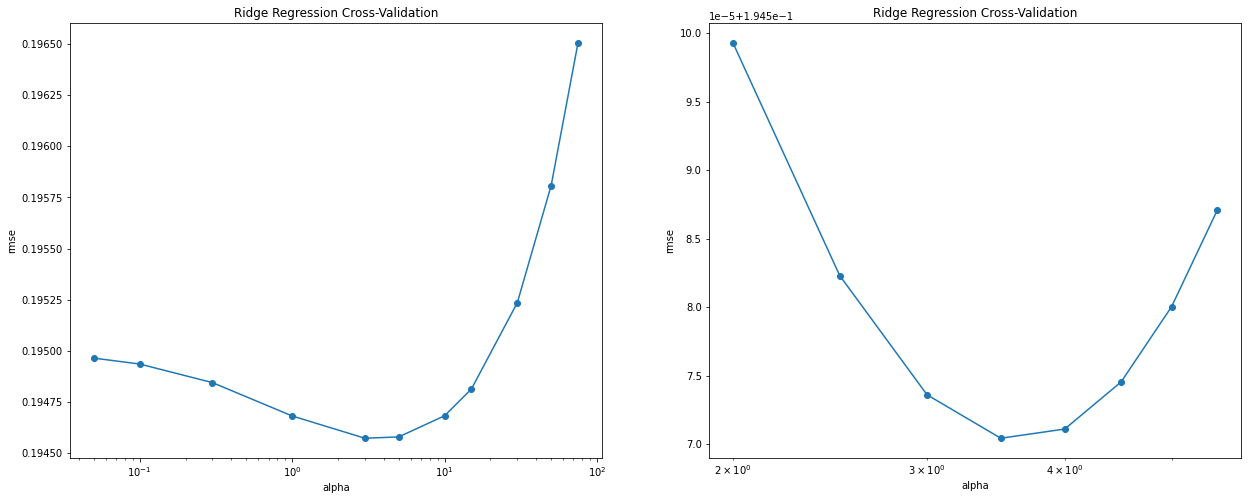

In [ ]:
cv_ridge1 = pd.Series(cv_ridge1, index = alphas1) 
cv_ridge2 = pd.Series(cv_ridge2, index = alphas2) 

fig, axes = plt.subplots(1,2,figsize=(21, 8))
cv_ridge1.plot(title = "Ridge Regression Cross-Validation", style='-o', ax = axes[0]) 
axes[0].set_xlabel("alpha") 
axes[0].set_ylabel("rmse")
axes[0].set_xscale('log')

cv_ridge2.plot(title = "Ridge Regression Cross-Validation", style='-o', ax = axes[1]) 
axes[1].set_xlabel("alpha") 
axes[1].set_ylabel("rmse")
axes[1].set_xscale('log')

In [ ]:
best_alpha = alphas2[np.argmin(cv_ridge2.values)]
RR_CV_best = -rmse_cv(Ridge(alpha = best_alpha))
RR = Ridge(alpha = best_alpha) 
RR.fit(X_train, y_train) 
y_train_RR = RR.predict(X_train)
y_test_RR = RR.predict(X_test)
ridge_results = pd.DataFrame({'algorithm':['Ridge Regression'],
            'CV error': RR_CV_best.mean(), 
            'CV std': RR_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_RR)],
            'test error': [mean_squared_error(y_test_RR, y_test_RR)],
            'training_r2_score': [r2_score(y_train, y_train_RR)],
            'test_r2_score': [r2_score(y_test, y_test_RR)]})
ridge_results

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,Ridge Regression,0.19457,0.003577,0.191916,0.0,0.581708,0.573136


###AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adareg_best = AdaBoostRegressor(n_estimators=1000, learning_rate=0.1, loss='linear')
adareg_CV_best = -rmse_cv(adareg_best)
adareg_best.fit(X_train, y_train) 
y_train_adareg = adareg_best.predict(X_train)
y_test_adareg = adareg_best.predict(X_test)

ada_best_results = pd.DataFrame({'algorithm':['AdaBoostRegressor'],
            'CV error': adareg_CV_best.mean(), 
            'CV std': adareg_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_adareg)],
            'test error': [mean_squared_error(y_test, y_test_adareg)],
            'training_r2_score': [r2_score(y_train, y_train_adareg)],
            'test_r2_score': [r2_score(y_test, y_test_adareg)]})
ada_best_results

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,AdaBoostRegressor,0.298307,0.014713,0.312945,0.326759,0.317917,0.290076


###XGBoost Regressor

In [ ]:
# d = {'Learning Rate':[],
#             'Mean CV Error': [],
#             'CV Error Std': [],
#             'Training Error': []}
# for lr in [0.01, 0.05, 0.1, 0.5]:
#     xgb_model = XGBRegressor(n_estimators=1000, learning_rate=lr, early_stopping=5)
#     cv_res = -cross_val_score(xgb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
#     xgb_model.fit(X_train, y_train)
#     y_train_xgb = xgb_model.predict(X_train)
#     d['Learning Rate'].append(lr)
#     d['Mean CV Error'].append(cv_res.mean())
#     d['CV Error Std'].append(cv_res.std())
#     d['Training Error'].append(mean_squared_error(y_train_xgb, y_train))

# xgb_tuning_1 = pd.DataFrame(d)
# xgb_tuning_1

In [ ]:
from xgboost import XGBRegressor

xbgreg_best = XGBRegressor(n_estimators=1000, learning_rate=0.1, early_stopping=5, max_depth=5, min_child_weight=1 )
xbgreg_CV_best = -rmse_cv(xbgreg_best)
xbgreg_best.fit(X_train, y_train) 
y_train_xgbreg = xbgreg_best.predict(X_train)
y_test_xgbreg = xbgreg_best.predict(X_test)
xgb_best_results = pd.DataFrame({'algorithm':['XGBRegressor'],
            'CV error': xbgreg_CV_best.mean(), 
            'CV std': xbgreg_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_xgbreg)],
            'test error': [mean_squared_error(y_test, y_test_xgbreg)],
            'training_r2_score': [r2_score(y_train, y_train_xgbreg)],
            'test_r2_score': [r2_score(y_test, y_test_xgbreg)]})
xgb_best_results

[18:23:51] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[18:28:36] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[18:33:21] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[18:38:04] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[18:42:50] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[18:47:34] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.



,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,XGBRegressor,0.178277,0.002888,0.126205,0.181032,0.724928,0.606685


### CatBoost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

catreg_best = CatBoostRegressor(n_estimators=1000, learning_rate=0.1, depth=5, l2_leaf_reg=1,verbose=None)
catreg_CV_best = -rmse_cv(catreg_best)
catreg_best.fit(X_train, y_train, verbose=False)
y_train_catreg = catreg_best.predict(X_train)
y_test_catreg = catreg_best.predict(X_test)

cat_best_results = pd.DataFrame({'algorithm':['CatBoostRegressor'],
            'CV error': catreg_CV_best.mean(), 
            'CV std': catreg_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_catreg)],
            'test error': [mean_squared_error(y_test, y_test_catreg)],
            'training_r2_score': [r2_score(y_train, y_train_catreg)],
            'test_r2_score': [r2_score(y_test, y_test_catreg)]})
cat_best_results

#Conclusion


In [ ]:
# concatenate the dataframes
bagging = pd.concat([tree_best_results, en_best_results,rfr_best_results, bdt_best_results,ben_best_results,etree_best_results])

In [ ]:
bagging

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,Decision Tree - Base Model,0.264577,0.014911,0.241688,0.248268,0.473226,0.460607
0,ElasticNet - Base Model,0.198815,0.003982,0.198051,0.200588,0.568336,0.564198
0,Random Forest Regressor,0.176186,0.003676,0.079652,0.177473,0.826394,0.614417
0,Bagged Decision Trees,0.229394,0.007902,0.228333,0.233723,0.502335,0.492208
0,Bagged ElasticNet,0.224099,0.007103,0.214662,0.216622,0.532130,0.529363
0,Extra Trees Regressor,0.200175,0.005814,0.000002,0.198782,0.999997,0.568122


In [ ]:
boosting = pd.concat([ridge_results,ada_best_results,xgb_best_results,cat_best_results])

In [ ]:
boosting

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,Ridge Regression,0.194570,0.003577,0.191916,0.000000,0.581708,0.573136
0,AdaBoostRegressor,0.298307,0.014713,0.312945,0.326759,0.317917,0.290076
0,XGBRegressor,0.178277,0.002888,0.126205,0.181032,0.724928,0.606685
0,CatBoostRegressor,0.174953,0.003059,0.151723,0.178623,0.669310,0.611920


Feature Importance of the Best Models

In bagging, the best model was Random Forest Regressor

In [ ]:
# Get feature importances
rfr_importances = rfr.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(rfr_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], rfr_importances[indices[f]]))

In [34]:
df1['price'].max()

10000

In [35]:
df1['price'].min()

0